<a href="https://colab.research.google.com/github/syhoons2/example/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM과 불확실성 추정

* 초평면
# ![alt text](https://images.deepai.org/glossary-terms/3bb86574825445cba73a67222b744648/hyperplane.png)


   

---



* 최대 마진 분류기 (Maxinum Margin Classifier)



![alt text](https://www.aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg)




---



* 서포트 벡터 머신


![alt text](http://i.imgur.com/vlG124W.png)


![alt text](https://www.learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png)

# 테스트


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

import numpy as np

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

In [0]:
X[:10], y[:10]

(array([[ 9.24222414,  1.36290933],
        [ 9.17124955,  3.52485535],
        [ 8.84264231,  1.29144424],
        [ 9.13144602,  0.15235637],
        [ 8.66686663,  0.93996493],
        [ 8.76869749,  1.19960487],
        [10.45227689,  1.14179259],
        [ 9.4874227 ,  3.93018752],
        [ 9.55834394,  4.10909742],
        [10.03578098,  4.41764995]]),
 array([-1,  1, -1, -1, -1, -1, -1,  1,  1,  1]))

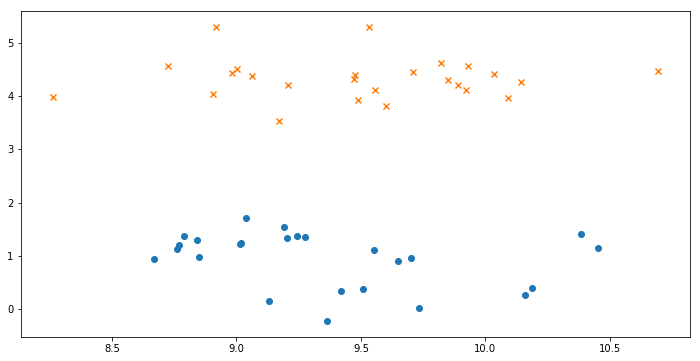

In [0]:
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.show()

# sklearn.svm SVC

SVC(kernel='linear', C=1.0)
* kernel (커널): ‘linear’(선형), ‘poly’(다항커널), ‘rbf’(Radial Basis Function), ‘sigmoid’ (시그모드)
* C (슬랙변수): 1.0 (기본값=1.0) 작을 수록 허용치가 커진다



---



In [0]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1e10)
model = model.fit(X, y)

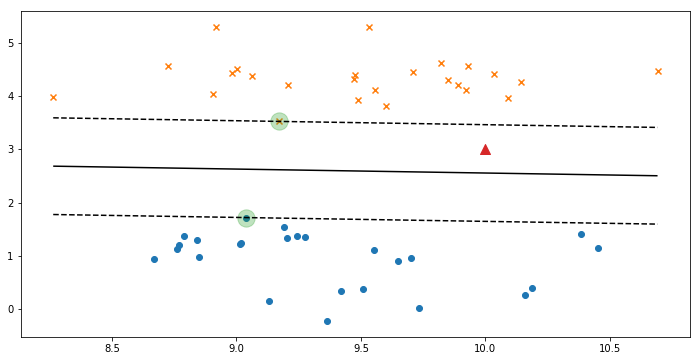

In [0]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

x_new = [10, 3]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.show()

* 파라미터 C에 따른 변화

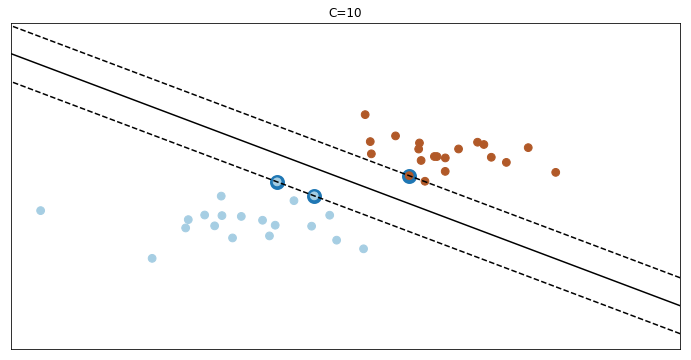

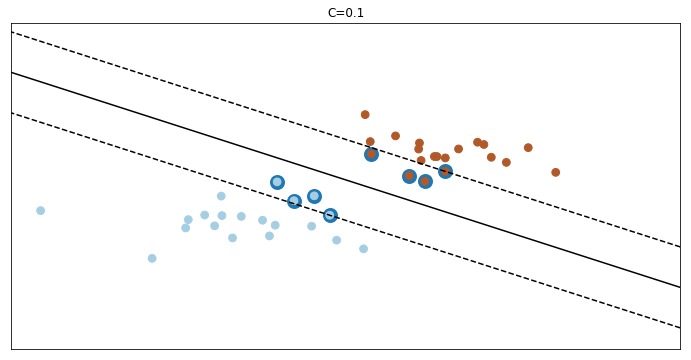

In [0]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

fignum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)
    
    plt.figure(fignum)
    
    x_jin = -5; x_jax = 5
    y_jin = -9; y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)

    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.axis('tight')
    plt.show()
    
    fignum += 1

# 분류의 불확실성
* decision_function
* predict_proba


## FDS
### 예측과 실제 가짓수
 * True Positive: 사기를 사기라고 정확하게 예측
 * True Negative: 정상을 정상이라고 정확하게 예측
 * False Positive: 정상을 사기라고 잘못 예측
 * False Negative: 사기를 정상이라고 잘못 예측
 
  

### Accuracy 정확도
 * 전체 샘플 중 맞게 예측한 샘플 수의 비율
  
  $$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$$

### Precision 정밀도
 * Positive 라고 예측한 샘플 중 실제로 Positive 인 샘플 수의 비율
 * 사기 거래라고 예측한 거래 중 실제 사기 거래의 비율 (유죄율)
  
 $$\text{precision} = \dfrac{TP}{TP + FP}$$

### Recall 재현율
 * 실제 Positive 인 샘플 중에 Positive 라고 예측한 샘플 수
 * 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율 (검거율)
 * TPR(true positive rate)
 * sensitivity(민감도, 주로 의학에서)
  
 $$\text{recall} = \dfrac{TP}{TP + FN}$$
### Fall-Out 위양성율
 * 실제 Negative 샘플 중에 Positive 라고 예측한 샘플 수
 * 실제 정상 거래 중에서 사기 거래라고 예측한 거래의 비율
 * FPR(alse positive rate)
 * specificity(특이도) = 1 - fall-out
 
 $$\text{fallout} = \dfrac{FP}{FP + TN}$$


## 데이터 스케일링

* scale(X): 기본 스케일, 평균이 0, 분산을 1으로 선형변환
* robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용 (아웃라이어의 영향 최소화)
* minmax_scale(X): 최대값과 최소값이 각각 1, 0이 되도록 스케일링
* maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링



In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

df = pd.DataFrame({'x':np.arange(-3, 9, dtype=float) })
df.iloc[-1] = 50 # outlier
df

,x
0,-3.0
1,-2.0
2,-1.0
3,0.0
4,1.0
5,2.0
6,3.0
7,4.0
8,5.0
9,6.0


In [0]:
df['scale(x)'] = scale(df[['x']])
df['robust_scale(x)'] = robust_scale(df[['x']])
df['minmax_scale(x)'] = minmax_scale(df[['x']])
df['maxabs_scale(x)'] = maxabs_scale(df[['x']])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.661395,-1.000000,0.000000,-0.06
1,-2.0,-0.587907,-0.818182,0.018868,-0.04
2,-1.0,-0.514419,-0.636364,0.037736,-0.02
3,0.0,-0.440930,-0.454545,0.056604,0.00
4,1.0,-0.367442,-0.272727,0.075472,0.02
5,2.0,-0.293953,-0.090909,0.094340,0.04
6,3.0,-0.220465,0.090909,0.113208,0.06
7,4.0,-0.146977,0.272727,0.132075,0.08
8,5.0,-0.073488,0.454545,0.150943,0.10
9,6.0,0.000000,0.636364,0.169811,0.12


In [0]:
df.describe()

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
count,12.00000,1.200000e+01,12.000000,12.000000,12.000000
mean,6.00000,3.700743e-17,0.636364,0.169811,0.120000
std,14.21267,1.044466e+00,2.584122,0.268164,0.284253
min,-3.00000,-6.613953e-01,-1.000000,0.000000,-0.060000
25%,-0.25000,-4.593023e-01,-0.500000,0.051887,-0.005000
50%,2.50000,-2.572093e-01,0.000000,0.103774,0.050000
75%,5.25000,-5.511628e-02,0.500000,0.155660,0.105000
max,50.00000,3.233488e+00,8.636364,1.000000,1.000000


In [0]:
!pip -q install mglearn

     |████████████████████████████████| 542kB 5.1MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


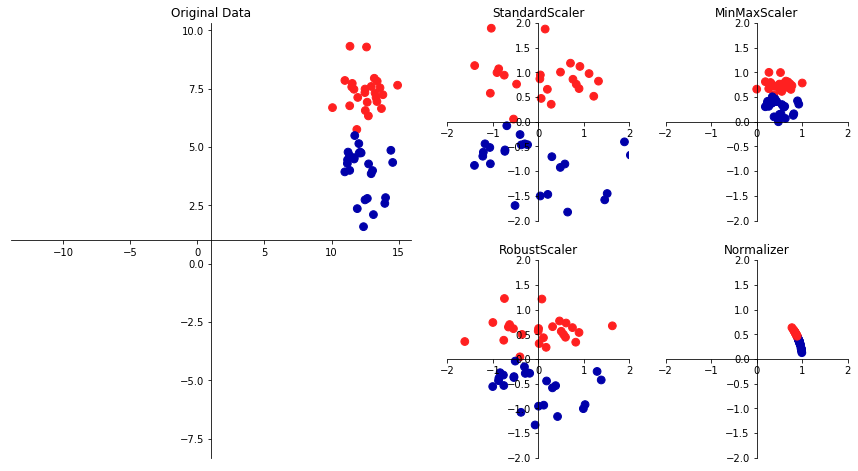

In [0]:
import mglearn
mglearn.plots.plot_scaling()

### Outlier detection
* http://colingorrie.github.io/outlier-detection.html